# SALES PREDICTION USING PYTHON

* Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, andadvertising platform selection.
* In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machinelearning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark onthe journey of sales prediction using machine learning in Python.

## Loading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
adv=pd.read_csv('advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
adv.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


## Knowing about the Data

In [4]:
adv.shape

(200, 4)

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
adv.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [7]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Plotting the Data

In [8]:
x=adv.drop('Sales',axis=1)
y=adv.Sales

<Axes: >

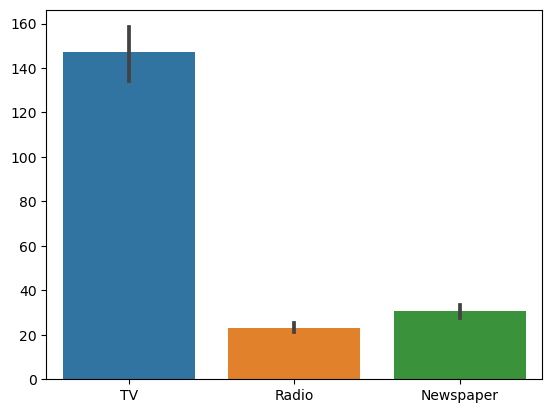

In [9]:
columns=['TV','Radio','Newspaper']
sns.barplot(adv[columns])

<Axes: xlabel='Sales', ylabel='Density'>

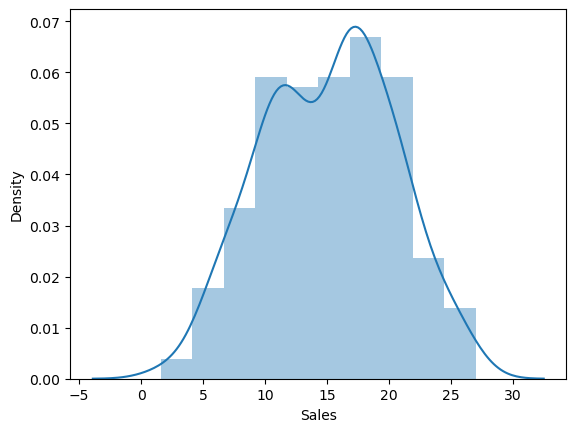

In [10]:
sns.distplot(adv['Sales'])

<Axes: xlabel='Radio', ylabel='Sales'>

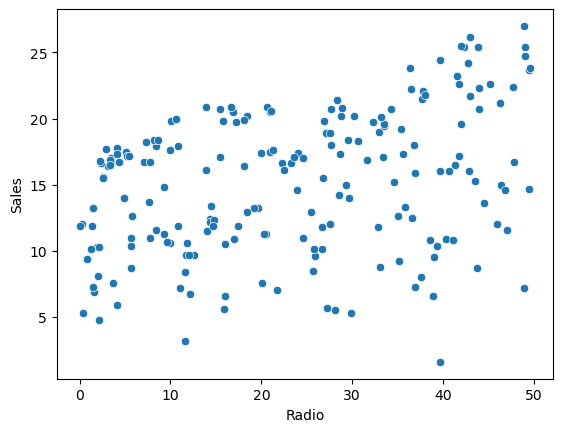

In [11]:
sns.scatterplot(adv,x='Radio',y="Sales")

<Axes: xlabel='TV', ylabel='Sales'>

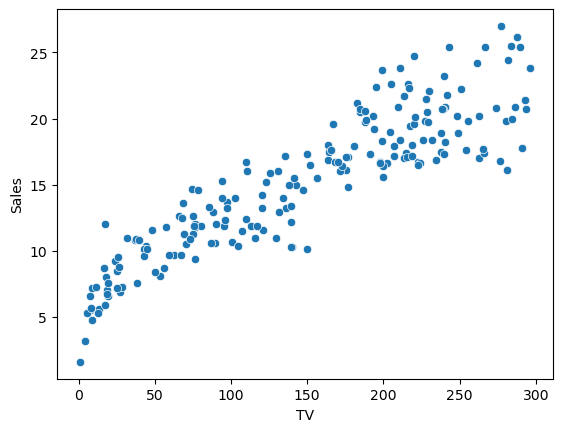

In [12]:
sns.scatterplot(adv,x='TV',y="Sales")

<Axes: xlabel='Newspaper', ylabel='Sales'>

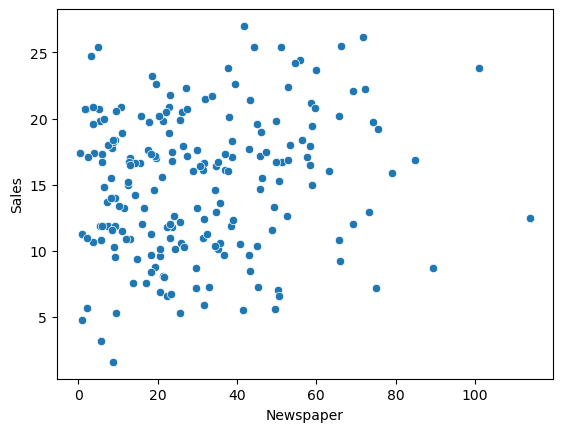

In [13]:
sns.scatterplot(adv,x='Newspaper',y="Sales")

In [14]:
correlation=adv.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

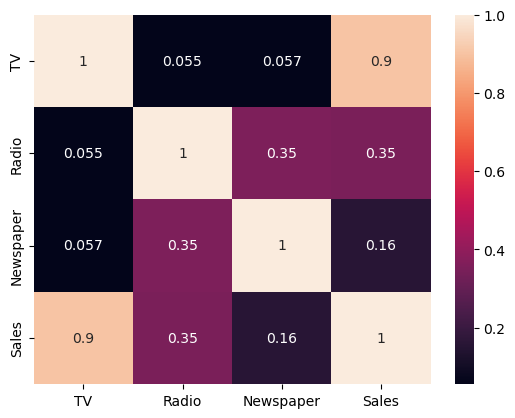

In [15]:
sns.heatmap(correlation,annot=True)

## Building the Model
### Splitting the Data

In [16]:
x=adv.drop('Sales',axis=1)
y=adv.Sales

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [18]:
x_train.shape

(140, 3)

In [19]:
x_test.shape

(60, 3)

In [20]:
y_train.shape

(140,)

In [21]:
y_test.shape

(60,)

## Building the Model

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
model.intercept_

4.661439720130822

In [25]:
model.coef_

array([ 0.05502392,  0.10251003, -0.00150711])

In [26]:
x.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [27]:
coeff=pd.DataFrame(model.coef_,index=x.columns)
coeff

,0
TV,0.055024
Radio,0.102510
Newspaper,-0.001507


### Model evaluation

In [28]:
model.score(x_test,y_test)

0.9071151423684274

In [30]:
y_pred=model.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(y_test,y_pred)
print("RMSE value is :",sqrt(mse))

RMSE value is : 1.539694765603123


In [32]:
model.score(x_train,y_train)

0.8993745840124558

In [33]:
y_predtrain=model.predict(x_train)
mse1=mean_squared_error(y_train,y_predtrain)
print("RMSE value is :",sqrt(mse1))

RMSE value is : 1.6929025956077552


In [34]:
print("Training set score: {:.2f}".format(model.score(x_train,y_train)))
print("Testing set score: {:.2f}".format(model.score(x_test,y_test)))

Training set score: 0.90
Testing set score: 0.91


Text(0.5, 1.0, 'Actual vs Predicted Sales')

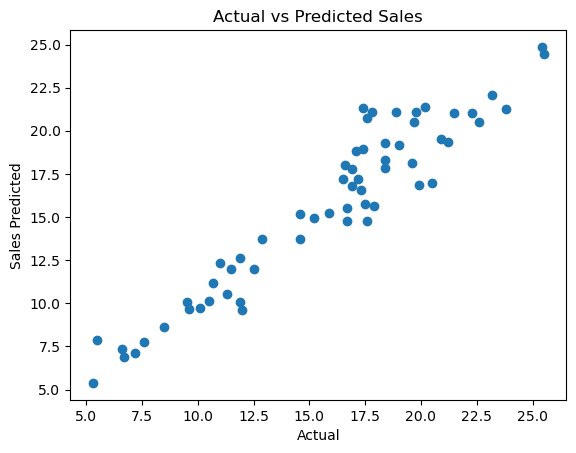

In [38]:
plt.scatter(y_test,y_pred)
plt.ylabel('Sales Predicted')
plt.xlabel('Actual')
plt.title('Actual vs Predicted Sales')

### Predictions

In [40]:
new=pd.DataFrame({'TV':[100],'Radio':[50],'Newspaper':[30]})
predicted=model.predict(new)
print("Predicted Sales is :",predicted)

Predicted Sales is : [15.24411968]


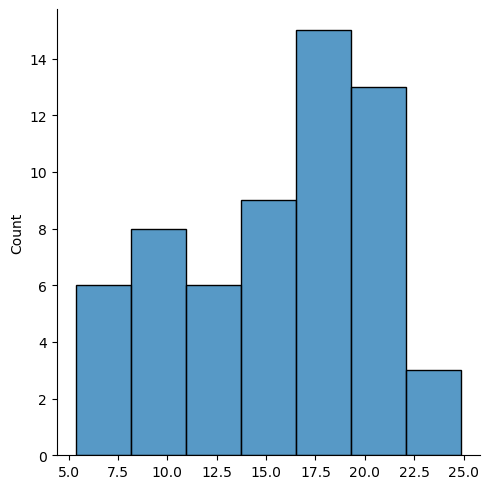

In [41]:
sns.displot(y_pred)